In [3]:
# Import math functions from NumPy
from numpy import *

# Import plotting functions from helper 
from helper import plot_asset_path, plot_probability, plot_binomial_tree

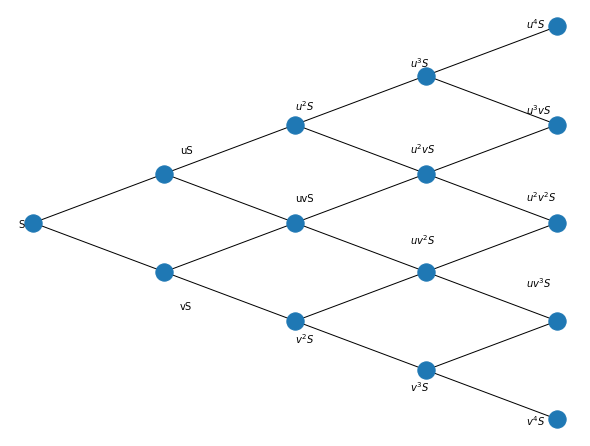

In [4]:
# Plot asset price path
plot_asset_path()

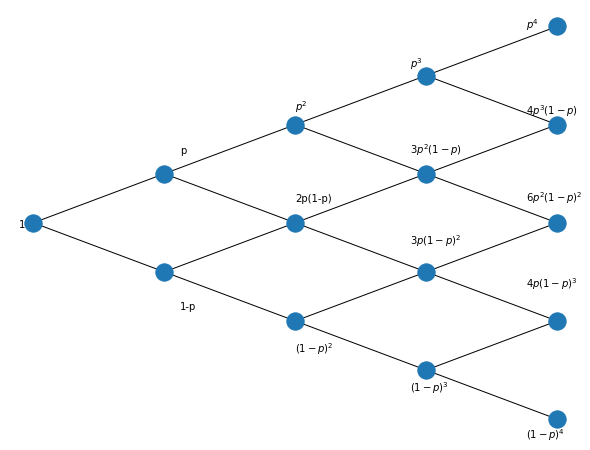

In [5]:
# Plot node probability
plot_probability()

In [6]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    
    Function to calculate binomial option pricing for european call option
    
    Params
    ------
    spot       -int or float    - spot price
    strike     -int or float    - strike price
    rate       -float           - interest rate
    time       -int or float    - expiration time
    steps      -int             - number of time steps
    output     -int             - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    --------
    out: ndarray
    An array object of price, payoff, option value and delta as specified by the output flag
    
    """
    
    # define parameters
    ts = time / steps
    u  = 1 + sigma*sqrt(ts) 
    v  = 1 - sigma*sqrt(ts)
    p  = 0.5 + rate *sqrt(ts) / (2*sigma)
    df = 1/(1+rate*ts)
    
    # initialize the arrays
    px = zeros((steps+1, steps+1))
    cp = zeros((steps+1, steps+1))
    V = zeros((steps+1, steps+1))
    d = zeros((steps+1, steps+1))
    
    # binomial loop : forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * power(v,i) * power(u,j-i)
            cp[i,j] = maximum(px[i,j] - strike, 0)
         
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0 
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    results = around(px,2), around(cp,2), around(V,2), around(d,4)

    return results[output]

In [7]:
# Asset price
px = binomial_option(100,100,0.05,0.20,1,4,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [8]:
# Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.20,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [9]:
# Option price 
opt = binomial_option(100,100,0.05,0.20,1,4,2)
opt

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [10]:
# Option delta
delta = binomial_option(100,100,0.05,0.20,1,4,3)
delta

array([[0.6241, 0.8053, 0.9645, 1.    , 0.    ],
       [0.    , 0.3393, 0.5553, 0.9086, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [11]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opt[0,0]:.2f}")

European Call Option Price using Binomial Tree Method: 10.29


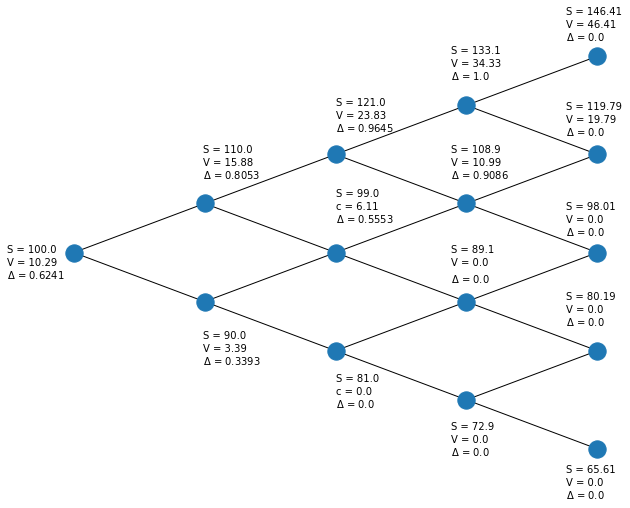

In [12]:
# Plot a 4-Step Binomial Tree 
plot_binomial_tree(px[0,0], px, opt, delta)

In [15]:
binomial_option(100,100,0.05,0.20,1,1000,2)[0,0]

10.45

In [27]:
from bsm_math import bsm_value

In [28]:
bsm_value(100, 100, 1, 0.05, 0, 0.2, 0)

10.450583572185565